# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season 1:winter, 2:spring, 3:summer, 4:fall
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

In [1]:
import pandas as pd
df = pd.read_csv('data/bike-sharing-hourly.csv')
df.shape

(17379, 17)

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [5]:
df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


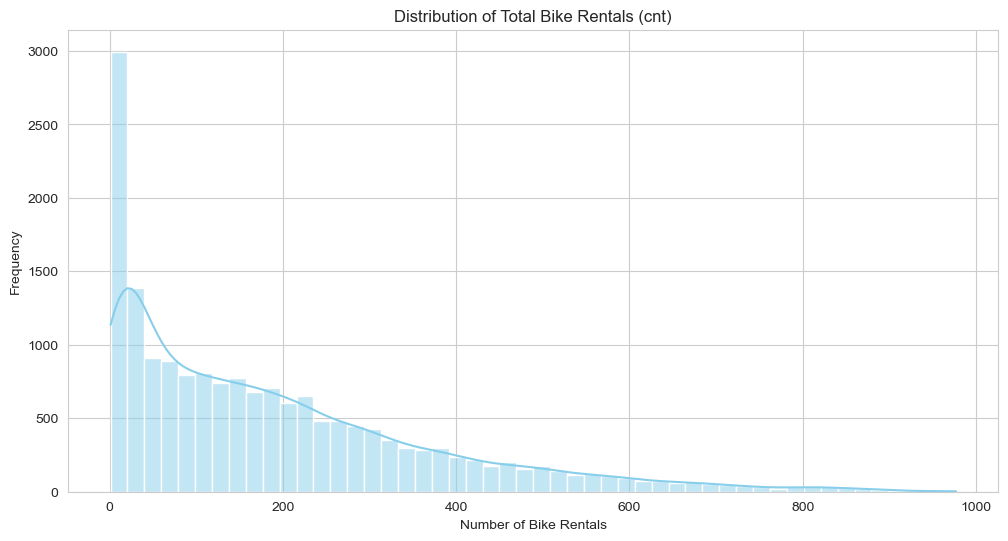

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set_style("whitegrid")

# Plot the distribution of the target variable 'cnt'
plt.figure(figsize=(12, 6))
sns.histplot(df['cnt'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.xlabel('Number of Bike Rentals')
plt.ylabel('Frequency')
plt.show()


* The distribution is right-skewed, meaning there are many hours with a relatively low number of rentals, but there are also a few peak hours with a high number of rentals.
* The most common range of bike rentals per hour seems to be around 0-100.
* There are some hours with rentals exceeding 800, which might indicate peak demand times.

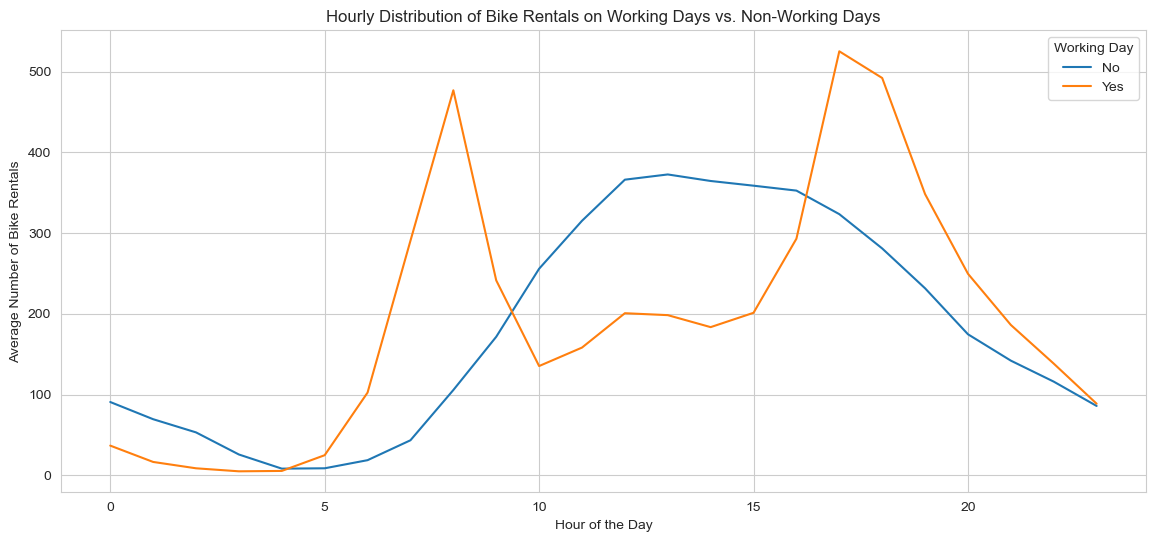

In [10]:
# Plot the hourly distribution of bike rentals on working days vs. non-working days
plt.figure(figsize=(14, 6))
sns.lineplot(x='hr', y='cnt', data=df, hue='workingday', palette="tab10", ci=None)
plt.title('Hourly Distribution of Bike Rentals on Working Days vs. Non-Working Days')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Bike Rentals')
plt.legend(title='Working Day', labels=['No', 'Yes'])
plt.show()


* Working Days:
    * There are two peaks: one in the morning around 8 AM and another in the evening around 5-6 PM. This pattern likely corresponds to commute hours.
    * The demand is relatively lower during mid-day hours.
* Non-Working Days:
    * The demand for bikes rises gradually from the morning and peaks around 1-3 PM.
    * The pattern suggests a more relaxed and dispersed use throughout the day.

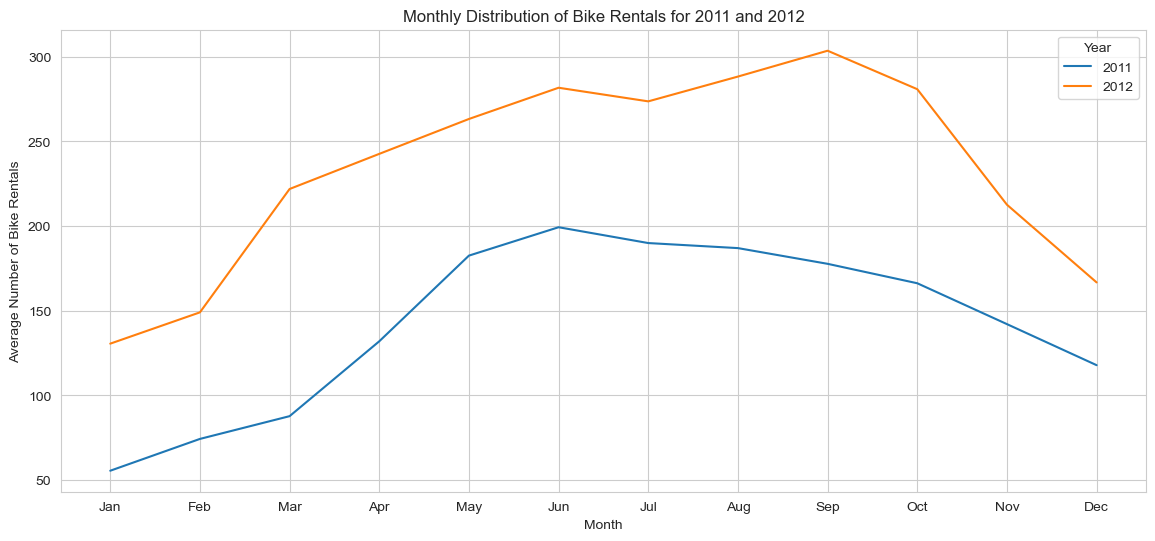

In [12]:
# Plot the monthly distribution of bike rentals
plt.figure(figsize=(14, 6))
sns.lineplot(x='mnth', y='cnt', data=df, hue='yr', palette="tab10", ci=None)
plt.title('Monthly Distribution of Bike Rentals for 2011 and 2012')
plt.xlabel('Month')
plt.ylabel('Average Number of Bike Rentals')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', labels=['2011', '2012'])
plt.show()


* The demand for bikes generally increases from January to June, peaking around the summer months (June/July).
* There's a decline in demand from July onwards, with the lowest demand during the winter months (December/January).
* Comparing the two years, 2012 generally had a higher demand than 2011 across all months. This could be due to increased popularity of the service, marketing efforts, or other external factors.

## PART II: Prediction Model

## PART III: Streamlit dashboard

In [5]:
### This part goes in a separate script ###